In [13]:
from settings import GEMINI_API_KEY
import google.generativeai as genai
genai.configure(api_key = GEMINI_API_KEY)

for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)

model = genai.GenerativeModel('models/gemini-1.0-pro-latest')
model.count_tokens("The quick brown fox jumps over the lazy dog.")


models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


total_tokens: 10

In [12]:
text= "testsetsetset"
title = "test"
test = genai.embed_content(model='models/text-embedding-004', 
                    content=text,
                    task_type = "retrieval_document",
                    title = title)

NotFound: 404 models/text-embedding-001 is not found for API version v1beta, or is not supported for embedContent. Call ListModels to see the list of available models and their supported methods.

# 1) RAG outline:


In [10]:
from RAG.traveller import RAG
rag = RAG()

SHEET_NAME = "Master Database" 
WORKSHEET_NAME = "inventory_processed"
df = rag.get_df(sheet_name = SHEET_NAME, worksheet_name = WORKSHEET_NAME)

d:\PycharmProjects\smart-travels\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df1 = rag.embed_df(df, title="Title", text="Text")

In [3]:
df1

,Destination,Title,Text,Embeddings
0,partners - putrajaya - cruise,cruise tasik putrajaya,Cruise Tasik Putrajaya\nCruise beyond your im...,"[0.02785702, 0.04049749, -0.038079727, -0.0661..."
1,partners - malacca - attractions,menara taming sari,MENARA TAMING SARI\nMELAKA\n\nTaming Sari Tow...,"[0.04842721, 0.06566964, -0.001694597, -0.0012..."
2,partners - malacca - attractions,melaka river cruise,MELAKA RIVER CRUISE\nS.M.A. MELAKA\n\nwww.mel...,"[0.060001522, 0.05154308, -0.019224696, -0.050..."
3,partners - terengganu - accommodation,perhentian island resort,**Perhentian Island Resort**\n\nPulau Perhent...,"[0.04545973, -0.003452046, -0.0065804133, -0.0..."
4,partner - terengganu - tour package,ag holidays,Pakej Aktiviti\nKem Pelajar & IPT\nSetu Adven...,"[-0.002626957, -0.0129379155, -0.025428655, -0..."
5,partners - terengganu - tour package,tenggol coral beach resort,Tenggol \nCoral Beach \nResort\n\n浮潜配套\n配套包括：...,"[0.057933476, 0.010546263, -0.009384707, -0.00..."
6,partners - terengganu - accommodation,ag holidays,AG SUITES\nKETENANGAN ITU MEMBAHAGIAKAN\n011-...,"[0.04481308, -0.001814087, 0.036361963, -0.020..."
7,partners - johor - theme park,legoland,MATTA FAIR EXCLUSIVE \nMitec 2C01\n\nPAY FOR ...,"[0.019847477, 0.0076364363, 0.002201427, -0.03..."
8,partners - johor - theme park,legoland,MATTA FAIR EXCLUSIVE \nMitec 2C01\n\nPAY FOR ...,"[0.01988468, 0.0057520024, 0.0025358577, -0.03..."
9,partners - negeri sembilan - leisure,sky ladder pineapple farm,SkyLadder\nPineapple Farm\nNature. Explore. R...,"[0.021492492, 0.026504407, -0.028603036, -0.00..."


In [5]:
query_embedding = rag.embed_text("penang exciting place to visit", task_type="retrieval_query")

In [9]:
import numpy as np
import pandas as pd
dataframe = df1
topN = 2

dot_products = np.dot(np.stack(dataframe['Embeddings']), query_embedding)
idx = np.argsort(dot_products)[-topN:][::-1]

# Create a DataFrame with passages and scores
top_passages = pd.DataFrame({'Text': dataframe.iloc[idx]['Text'], 'Score': dot_products[idx]})

In [10]:
top_passages.reset_index(drop=True).rename(columns={'Text': 'Passage', 'Score': 'Similarity Score'})

,Passage,Similarity Score
0,AG SUITES\nKETENANGAN ITU MEMBAHAGIAKAN\n011-...,-0.024121
1,Tasiik Villa\nInternational Resort\nPort Dick...,-0.041005


In [11]:
top_passages

,Text,Score
6,AG SUITES\nKETENANGAN ITU MEMBAHAGIAKAN\n011-...,-0.024121
11,Tasiik Villa\nInternational Resort\nPort Dick...,-0.041005


## 2) Cohere RAG test

In [1]:
from RAG.cohere_RAG import RAG
query = "Penang, 2 days, foodie"
rag = RAG()
result, recommendations = rag.rag_pipeline(query = query, sheet_name = "Master Database", worksheet_name="inventory_processed", reembed= False)

In [27]:
print(recommendations[0])

**Activities Description:**

Enjoy a spacious room suitable for families. Immerse yourself in the local delights of Penang. Take a refreshing dip in the new splash pool.

**Highlights:**

* Spacious family-friendly rooms
* Local culinary experiences
* New splash pool

**Timings:**

NA

**Pricings:**

* RM158nett per night

**Contact Information:**

* Phone: 011-1739 8714
* Website: www.raiahotels.com.my

**Terms and Conditions:**

* Prices include 8% service charge and 6% SST.
* Buy now, stay later until 30th September 2024.
* Surcharge of RM50 applicable for eve of public holidays and public holidays.


# 2) Traveller 2

In [1]:
import importlib

from RAG import traveller
importlib.reload(traveller)

from RAG.traveller import traveller
rag = traveller()
# message = {
#      "destination": "terengganu",
#      "dates": "july",
#      "duration": "3 days",
#      "number_of_pax": "2",
#      "filter": "hidden gems",
#      "budget": "$1000"
#  }

# df = rag.get_df(sheet_name = "Master Database", worksheet_name = "inventory_processed")

message = {"prompt": "i want to plan a trip to perlis for 2 days for 2 pax, exciting theme"}
itinerary_payload = rag.generate_travel_itinerary(message=message)


d:\PycharmProjects\smart-travels\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Prompt: i want to plan a trip to perlis for 2 days for 2 pax, exciting theme
----> {'destination': 'perlis', 'dates': 'NAN', 'duration': '2 days', 'number_of_pax': 2, 'filter': ['exciting'], 'budget': 'NAN'}
Loading inventory...
Filtering inventory...
                         Type Tags                   Title  \
114                 excursion         unic astana holidays   
115                 excursion       unic astana holidays 3   
116                 excursion       unic astana holidays 2   
117   excursion accommodation        smart leisure travels   
118             accommodation             gua kelam chalet   
119                 excursion                nakawan ultra   
120                 excursion                    club rock   
122                 excursion       unic astana holidays 4   

                                           Description Vendor ID Activity ID  
114   # PERLIS ECO XVENTURE - LET'S TRAVEL WITH OUR...      1327         115  
115   **Sensation of Harumanis*

In [6]:
# get unique Locations in df
locations = df["Location"].unique()
locations

array(['Putrajaya', 'Malacca', ' Malacca ', ' Terengganu ', 'Terengganu ',
       'Johor', 'Negeri Sembilan', 'Penang', ' Pahang ', 'Pahang',
       ' pahang ', ' putrajaya ', ' kelantan ', ' sabah ', '',
       ' sarawak ', ' penang ', ' negeri sembilan ', ' kuala lumpur ',
       ' kuala Lumpur ', ' johor ', ' terengganu ', ' selangor ',
       ' perak ', ' perlis ', ' kedah '], dtype=object)

In [3]:
import json
output = itinerary_payload["response"]
output

{'prompt': 'destination: terengganu, dates: july,duration: 3 days * number of pax: 2* tags: hidden gems\n                                * budget: $1000\n                                ',
 'summary': '{"summary": "Immerse yourselves in the hidden gems of Terengganu, where untouched beauty and thrilling adventures await! Our specially curated itinerary will take you off the beaten path to discover secluded waterfalls, pristine beaches, and rich cultural experiences. Embark on exhilarating hikes through lush rainforests, cascading down to crystal-clear pools, perfect for a refreshing dip. Explore the vibrant underwater world with snorkeling trips to hidden coves, teeming with marine life.  Indulge in the local flavors, savoring authentic Malay cuisine amidst the charm of traditional villages. Let the magic of Terengganu captivate your senses as you create unforgettable memories in this tropical paradise.", "cover_image": "terengganu.jpeg"}',
 'pricing': '{"total_cost": "unavailable"}',


In [7]:
# count number of tokens:
print(f"input token: {rag.model.count_tokens(itinerary_payload["prompt"])}")
print(f"response token: {rag.model.count_tokens(itinerary_payload["response"].text)}")

input token: total_tokens: 3213

response token: total_tokens: 1005



In [15]:
x={'summary': "Prepare to be enchanted by Penang, a destination that tantalizes the palate, captivates the senses, and sparks the imagination! As a foodie, you'll embark on a gastronomic adventure through bustling street markets and charming cafes, savoring the rich flavors of Malaysian, Chinese, and Indian cuisines. The island's attractions will leave you spellbound, from the vibrant street art scene and historic temples to the lush botanical gardens and colonial architecture. And for a touch of magic, delve into the world of illusion and wonder at the captivating Magic World Penang, where interactive exhibits and mind-bending illusions await.",
 'itinerary': [{'day': 'day 1',
   'title': 'A Foodie Adventure Through Georgetown',
   'description': "Start your day with a delectable breakfast at one of Penang's many hawker centers, where you can sample local favorites such as nasi lemak, char koay teow, and roti canai. After breakfast, embark on a journey through the heart of Georgetown, a UNESCO World Heritage Site, exploring the city's rich history and vibrant culture through its captivating street art. Discover hidden alleyways adorned with murals and sculptures, each telling a unique story of Penang's past and present.  Enjoy a delightful lunch at a traditional Nyonya restaurant, where you'll be treated to a symphony of flavors from the Peranakan cuisine, a unique blend of Chinese and Malay influences.  As the day progresses, immerse yourselves in the enchanting world of Magic World Penang. Prepare to be amazed by a collection of interactive exhibits, optical illusions, and mind-bending displays that will leave you questioning reality. End your evening with a delightful dinner at one of Penang's many hawker centers, savoring the flavors of local delicacies while enjoying the lively atmosphere.",
   'daily_itinerary': [{'time': 'morning',
     'title': 'Georgetown Street Art',
     'description': "Embark on a self-guided walking tour through the colorful streets of Georgetown, discovering captivating murals and sculptures that depict the city's rich history, culture, and everyday life. Let the art lead you through hidden alleyways and bustling streets, each turn revealing a new and exciting masterpiece.",
     'inventory': 'unavailable',
     'price': 'free (walking tour)'},
    {'time': 'afternoon',
     'title': 'Magic World Penang',
     'description': 'Step into a world of illusion and wonder at Magic World Penang. Let your imagination run wild as you explore a collection of interactive exhibits, optical illusions, and mind-bending displays that will leave you questioning reality. Capture unforgettable photos and create lasting memories as you immerse yourselves in this captivating world.',
     'inventory': 'VendorID: 13',
     'price': 'unavailable'}]},
  {'day': 'day 2',
   'title': 'A Scenic Escape and Culinary Delights',
   'description': "Embark on a scenic adventure to Penang Hill, a cool and breezy retreat offering breathtaking panoramic views of the island. Take a leisurely ride on the funicular train, ascending through lush rainforest and enjoying glimpses of exotic flora and fauna. At the top, marvel at the stunning vistas of Georgetown, the Penang Bridge, and the mainland in the distance. Capture unforgettable photos and soak in the refreshing mountain air. In the afternoon, tantalize your taste buds with a delightful culinary experience. Choose from a variety of dining options, from casual cafes to fine-dining restaurants, each offering a unique perspective on Penang's diverse cuisine. Indulge in fresh seafood, savor the flavors of local delicacies, or treat yourselves to international fare while enjoying the picturesque surroundings.",
   'daily_itinerary': [{'time': 'morning',
     'title': 'Penang Hill',
     'description': 'Escape the city bustle and ascend Penang Hill, a cool and breezy retreat offering breathtaking panoramic views of Georgetown, the Penang Bridge, and the mainland. Choose to hike up amidst lush rainforest or take a leisurely ride on the funicular train, enjoying glimpses of exotic flora and fauna along the way. At the top, capture unforgettable photos, soak in the refreshing mountain air, and explore the various attractions, including The Habitat Penang Hill, a world-class eco-tourism site.',
     'inventory': 'unavailable',
     'price': 'Funicular Train: Adult RM30 (round trip), Child RM15 (round trip)'},
    {'time': 'afternoon',
     'title': "De' 8000 Mini Golf Cafe",
     'description': "Challenge yourselves to a fun-filled mini-golf adventure at De' 8000 Mini Golf Cafe. Putt your way through 18 challenging holes, each with unique obstacles and themes, and enjoy some friendly competition. Afterward, relax and refuel at the cafe, which offers a variety of halal food and beverages, making it a perfect spot to unwind after a day of exploration.",
     'inventory': 'VendorID: 14',
     'price': 'unavailable'}]}],
 'pricing': {'total_cost': 'unavailable',
  'per_day_cost': 'unavailable',
  'per_activity_cost': 'unavailable'}}

In [18]:
x["itinerary"][1]

{'day': 'day 2',
 'title': 'A Scenic Escape and Culinary Delights',
 'description': "Embark on a scenic adventure to Penang Hill, a cool and breezy retreat offering breathtaking panoramic views of the island. Take a leisurely ride on the funicular train, ascending through lush rainforest and enjoying glimpses of exotic flora and fauna. At the top, marvel at the stunning vistas of Georgetown, the Penang Bridge, and the mainland in the distance. Capture unforgettable photos and soak in the refreshing mountain air. In the afternoon, tantalize your taste buds with a delightful culinary experience. Choose from a variety of dining options, from casual cafes to fine-dining restaurants, each offering a unique perspective on Penang's diverse cuisine. Indulge in fresh seafood, savor the flavors of local delicacies, or treat yourselves to international fare while enjoying the picturesque surroundings.",
 'daily_itinerary': [{'time': 'morning',
   'title': 'Penang Hill',
   'description': 'Escape 

In [13]:
import json
xj = json.loads(x)

In [1]:
import google.generativeai as genai
import google.ai.generativelanguage as glm
import json
from settings import GEMINI_API_KEY  # Ensure you have your API key set up

apiKey = GEMINI_API_KEY  # Please set your API key.

# Define the JSON schema that aligns with your desired output structure
jsonSchema = {
    "title": "Travel Itinerary",
    "type": "object",
    "properties": {
        "summary": {"type": "string"},
        "itinerary": {
            "type": "object",
            "properties": {
                "day1_summary": {"type": "string"},
                "day1_itinerary": {
                    "type": "array",
                    "items": {
                        "type": "object",
                        "properties": {
                            "title": {"type": "string"},
                            "text": {"type": "string"},
                            "inventory": {"type": "string"},  # 'available!' or 'unavailable!'
                            "price": {"type": "number"}
                        }
                    }
                },
                "day2_summary": {"type": "string"},
                "day2_itinerary": {
                    "type": "array", 
                    "items": {
                        "type": "object",
                        "properties": {
                            "title": {"type": "string"},
                            "text": {"type": "string"},
                            "inventory": {"type": "string"},
                            "price": {"type": "number"}
                        }
                    }
                }
            }
        },
        "pricing": {
            "type": "object",
            "properties": {
                "total_cost": {"type": "number"},  
                "per_day_cost": {"type": "number"},
                "per_activity_cost": {"type": "string"}  
            }
        }
    },
    "required": ["summary", "itinerary", "pricing"]  # Ensure all sections are present
}


# Construct your prompt with the schema embedded
prompt = f"""Generate a detailed travel itinerary for Kelantan, Malaysia for a 3-day trip.
Follow the JSON schema strictly and fill in all required fields.
<JSONSchema>{json.dumps(jsonSchema)}</JSONSchema>"""

genai.configure(api_key=apiKey)
model = genai.GenerativeModel(
    model_name="gemini-1.5-pro-latest",
    generation_config=glm.GenerationConfig(response_mime_type="application/json",response_schema="application/json",),
)
response = model.generate_content(prompt)
print(response.text)


d:\PycharmProjects\smart-travels\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: Message must be initialized with a dict: google.ai.generativelanguage.v1beta.GenerationConfig

In [21]:
import json
x = json.loads(response.text)

In [22]:
x

{'summary': 'Explore the cultural heart of Malaysia with this 3-day Kelantan itinerary. Discover historical landmarks, immerse yourself in local life at vibrant markets, and savor delicious Malay cuisine.',
 'itinerary': {'day1_summary': 'Arrival in Kota Bharu and cultural immersion',
  'day1_itinerary': [{'title': 'Morning: Arrival and Check-in',
    'text': 'Arrive at Sultan Ismail Petra Airport (KBR) and check in to your hotel in Kota Bharu. ',
    'inventory': 'Flight Ticket, Hotel Booking',
    'price': 50},
   {'title': 'Afternoon: Cultural Heritage Tour',
    'text': "Visit the Kelantan State Museum to delve into the region's history and artistry. Then, explore the ornate architecture of the Istana Jahar and the Grand Mosque.",
    'inventory': 'Museum Ticket, Transportation',
    'price': 30},
   {'title': 'Evening: Pasar Siti Khadijah & Dinner',
    'text': 'Experience the bustling atmosphere of Pasar Siti Khadijah, a market primarily run by women, and enjoy a delicious dinner

In [15]:
import google.generativeai as genai
import google.ai.generativelanguage as glm
import json

from settings import GEMINI_API_KEY  # Ensure you have your API key set up

apiKey = GEMINI_API_KEY  # Please set your API key.


jsonSchema = {
    "title": "5 popular cookie recipes",
    "description": "List 5 popular cookie recipes by including the following properties.",
    "type": "array",
    "items": {
        "type": "object",
        "properties": {
            "recipe_name": {"description": "Names of recipe.", "type": "string"},
            "materials": {
                "description": "Requirement materials for running the recipe.",
                "type": "array",
                "items": {
                    "type": "object",
                    "properties": {
                        "material": {
                            "description": "Requirement material for running the recipe.",
                            "type": "string",
                        },
                        "amount": {
                            "description": "Requirement amount of material for running the recipe. Unit is grams.",
                            "type": "number",
                        },
                        "cost": {
                            "description": "Cost of requirement material for running the recipe. Unit is dollar.",
                            "type": "number",
                        },
                    },
                    "required": ["material", "material", "cost"],
                    "additionalProperties": False,
                },
            },
        },
        "additionalProperties": False,
    },
}

prompt = f"Follow JSON schema.<JSONSchema>{json.dumps(jsonSchema)}</JSONSchema>"
genai.configure(api_key=apiKey)
model = genai.GenerativeModel(
    model_name="gemini-1.5-pro-latest",
    generation_config={  # Modified section
        "response_mime_type": "application/json",
    },
)
response = model.generate_content(prompt)
print(response.text)

[{"recipe_name": "Chocolate Chip Cookies", "materials": [{"material": "Flour", "amount": 250, "cost": 2.0}, {"material": "Sugar", "amount": 150, "cost": 1.5}, {"material": "Chocolate Chips", "amount": 200, "cost": 3.5}]}, {"recipe_name": "Peanut Butter Cookies", "materials": [{"material": "Flour", "amount": 200, "cost": 1.8}, {"material": "Peanut Butter", "amount": 250, "cost": 4.0}, {"material": "Sugar", "amount": 180, "cost": 1.7}]}, {"recipe_name": "Oatmeal Raisin Cookies", "materials": [{"material": "Flour", "amount": 220, "cost": 2.1}, {"material": "Oats", "amount": 150, "cost": 1.2}, {"material": "Raisins", "amount": 100, "cost": 2.8}]}, {"recipe_name": "Sugar Cookies", "materials": [{"material": "Flour", "amount": 280, "cost": 2.4}, {"material": "Sugar", "amount": 200, "cost": 2.2}, {"material": "Butter", "amount": 150, "cost": 3.0}]}, {"recipe_name": "Snickerdoodle Cookies", "materials": [{"material": "Flour", "amount": 260, "cost": 2.2}, {"material": "Sugar", "amount": 180, "c

In [6]:
import google.ai.generativelanguage as glm
glm.GenerationConfig(response_mime_type="application/json")

response_mime_type: "application/json"

ETL 2

In [ ]:
from settings import GEMINI_API_KEY1
from data.ingest import GoogleDriveExtractor

extractor = GoogleDriveExtractor(
    credentials_file="smart-platform.json", 
    sheet_name="Master Database",
    worksheet_name="inventory", 
    gemini_api_key=GEMINI_API_KEY1
)

In [ ]:
{
    "itinerary": [
        {
            "activity": [
                {
                    "Activity ID": "115",
                    "Vendor ID": "1327",
                    "area": "Bukit Lagi",
                    "cover": "1327/115.jpg",
                    "description": "Embark on a gentle hike through the picturesque trails of Bukit Lagi, home to the fascinating Gua Cenderawasih. The trail offers a wonderful opportunity to connect with nature, with its verdant surroundings and unique limestone formations. As you wander through the area, keep an ear out for the melodic calls of the cave's resident swiftlets, adding to the charm of your journey.",
                    "price": "RM 180.00/USD 45.00",
                    "title": "Easy Hiking Trail"
                },
                {
                    "Activity ID": "NA",
                    "Vendor ID": "NA",
                    "area": "Bukit Lagi",
                    "cover": "restoran_cenderawasih.jpg",
                    "description": "After your hike, savor a delicious lunch at Restoran Cenderawasih, a local favorite known for its authentic Malaysian cuisine. Indulge in flavorful dishes like Nasi Lemak, Laksa, or Char Koay Teow, while enjoying the serene ambiance of the restaurant's garden setting.",
                    "price": "NA",
                    "title": "Restoran Cenderawasih"
                }
            ],
            "area": "Bukit Lagi",
            "cover": "bukitlagi.jpg",
            "day": 1,
            "description": "Welcome to Perlis, a hidden gem in Malaysia! Your adventure begins with a scenic drive to Bukit Lagi, home to the intriguing Gua Cenderawasih (Cave of Birds). Enjoy an easy hike through the verdant trails, breathing in the fresh air and marveling at the unique rock formations. Keep an eye out for the cave's namesake inhabitants - the swiftlets that make their nests high up on the cave walls.",
            "tags": [
                "nature"
            ],
            "time": "morning",
            "title": "Arrival and Easy Hiking at Bukit Lagi"
        },
        {
            "activity": [
                {
                    "Activity ID": "115",
                    "Vendor ID": "1327",
                    "area": "Kangar Area /K. Perlis",
                    "cover": "1327/115.jpg",
                    "description": "Embark on a memorable cycling adventure through the picturesque Perlis countryside. Pedal through quaint villages, passing by vibrant green paddy fields and traditional wooden houses. Immerse yourselves in the peaceful ambiance of rural Perlis, a welcome change from the hustle and bustle of city life. The gentle breeze and scenic landscapes will create an unforgettable experience.",
                    "price": "RM 180.00/USD 55.00",
                    "title": "CYCLING TOUR"
                },
                {
                    "Activity ID": "NA",
                    "Vendor ID": "NA",
                    "area": "Kangar Area /K. Perlis",
                    "cover": "warung_tepi_sawah.jpg",
                    "description": "Take a break from your cycling adventure and enjoy a delightful afternoon tea at Warung Tepi Sawah. This charming eatery is nestled amidst the paddy fields, offering stunning views and a tranquil atmosphere. Indulge in local delicacies like Roti Canai, Kuih Muih, and refreshing Teh Tarik, while enjoying the gentle breeze and picturesque scenery.",
                    "price": "NA",
                    "title": "Warung Tepi Sawah"
                }
            ],
            "area": "Kangar Area /K. Perlis",
            "cover": "perliscountryside.jpg",
            "day": 1,
            "description": "This afternoon, experience the beauty of Perlis at a leisurely pace with a cycling tour through the countryside. Pedal through charming villages, surrounded by lush paddy fields and traditional wooden houses. Feel the gentle breeze as you soak in the tranquility of rural Perlis, a stark contrast to the bustling city life.",
            "tags": [
                "nature"
            ],
            "time": "afternoon",
            "title": "Cycling through the Perlis Countryside"
        },
        {
            "activity": [
                {
                    "Activity ID": "115",
                    "Vendor ID": "1327",
                    "area": "Chuping / Way Kellian / Tasoh",
                    "cover": "1327/115.jpg",
                    "description": "As darkness descends, embark on a mesmerizing stargazing adventure far from the city lights. Perlis's pristine skies provide an unparalleled view of the Milky Way and countless stars, creating a truly awe-inspiring spectacle. Accompanied by an experienced guide, delve into the wonders of the cosmos, learning about constellations, planets, and celestial phenomena. Let the vastness of the universe captivate your senses as you create unforgettable memories under the celestial tapestry.",
                    "price": "RM 200.00/USD 50.00 Per Person",
                    "title": "STARGAZING TOUCH"
                },
                {
                    "Activity ID": "NA",
                    "Vendor ID": "NA",
                    "area": "Wang Kelian",
                    "cover": "gerai_malam_wang_kelian.jpg",
                    "description": "Before your stargazing adventure, indulge in a flavorful dinner at Gerai Malam Wang Kelian, a bustling night market offering a wide array of local delicacies. Sample traditional Malay dishes, grilled seafood, and refreshing drinks, immersing yourselves in the vibrant atmosphere of Perlis's culinary scene.",
                    "price": "NA",
                    "title": "Gerai Malam Wang Kelian"
                }
            ],
            "area": "Chuping / Way Kellian / Tasoh",
            "cover": "perlisnight.jpg",
            "day": 1,
            "description": "As night falls, journey to a secluded spot away from city lights for a magical stargazing experience. Perlis's clear skies offer a breathtaking view of the Milky Way and countless stars. Learn about the constellations and celestial wonders from your guide, creating unforgettable memories under the celestial tapestry.",
            "tags": [
                "nature"
            ],
            "time": "evening",
            "title": "Stargazing Under the Perlis Sky"
        },
        {
            "activity": [
                {
                    "Activity ID": "115",
                    "Vendor ID": "1327",
                    "area": "Bukit Timah Tasoh / Kuala Perlis",
                    "cover": "1327/115.jpg",
                    "description": "Begin your day with a visit to the tranquil Timah Tasoh Lake, a sanctuary for nature enthusiasts and birdwatchers alike. Immerse yourselves in the serene ambiance as you observe a variety of bird species in their natural habitat. For a more immersive experience, opt for a leisurely boat ride across the lake, soaking in the picturesque surroundings.",
                    "price": "RM 280.00/USD 85.00",
                    "title": "TIMAH TASOH RETREAT"
                },
                {
                    "Activity ID": "115",
                    "Vendor ID": "1327",
                    "area": "Three-Quarter Coffee & Ambrose Cafe",
                    "cover": "1327/115.jpg",
                    "description": "Following your time at Timah Tasoh Lake, embark on a captivating journey through the Hidden Coffee Trail. Discover the secrets of local coffee cultivation as you explore plantations and learn about the process from bean to cup. Indulge your senses with the rich aroma and flavors of freshly brewed Perlis coffee, savoring the unique characteristics of this local delicacy.",
                    "price": "RM 180.00/USD 45.00",
                    "title": "HIDDEN COFFEE TRAIL"
                },
                {
                    "Activity ID": "NA",
                    "Vendor ID": "NA",
                    "area": "Timah Tasoh Lake",
                    "cover": "nasi_lemak_daun_pisang.jpg",
                    "description": "Start your day with a taste of local cuisine at Nasi Lemak Daun Pisang, a popular spot known for its fragrant Nasi Lemak served in traditional banana leaf parcels. Indulge in the creamy coconut rice, spicy sambal, and crispy anchovies, a perfect start to your day of exploration.",
                    "price": "NA",
                    "title": "Nasi Lemak Daun Pisang"
                }
            ],
            "area": "Timah Tasoh Lake & Three-Quarter Coffee & Ambrose Cafe",
            "cover": "timahtasoh.jpg",
            "day": 2,
            "description": "Start your day with a visit to the serene Timah Tasoh Lake, a haven for nature lovers and birdwatchers. Enjoy the tranquility of the lake as you spot various bird species, or opt for a leisurely boat ride. Afterward, embark on a unique Hidden Coffee Trail, discovering local coffee plantations and savoring the rich aroma and flavors of freshly brewed Perlis coffee.",
            "tags": [
                "nature"
            ],
            "time": "morning",
            "title": "Timah Tasoh Lake and Hidden Coffee Trail"
        },
        {
            "activity": [
                {
                    "Activity ID": "115",
                    "Vendor ID": "1327",
                    "area": "Gua Kelam",
                    "cover": "1327/115.jpg",
                    "description": "Embark on an exhilarating adventure into the depths of Gua Kelam, a fascinating cave renowned for its unique suspension bridge traversing an underground stream. Venture through the cave's cool and mysterious interior, marveling at the intricate formations of stalactites and stalagmites that adorn its walls. The play of light and shadow within the cave creates a truly mesmerizing atmosphere, transporting you to another world.",
                    "price": "RM 220.00/ USD 55.00",
                    "title": "CAVING EXPLORATION"
                },
                {
                    "Activity ID": "NA",
                    "Vendor ID": "NA",
                    "area": "Gua Kelam",
                    "cover": "restoran_nelayan.jpg",
                    "description": "After your cave exploration, indulge in a well-deserved lunch at Restoran Nelayan, a popular eatery known for its fresh seafood dishes. Sample the catch of the day, grilled to perfection and seasoned with local spices, or opt for classic Malay dishes like Mee Goreng or Nasi Goreng.",
                    "price": "NA",
                    "title": "Restoran Nelayan"
                }
            ],
            "area": "Gua Kelam",
            "cover": "guakelam.jpg",
            "day": 2,
            "description": "Experience the thrill of exploring Gua Kelam, a unique cave featuring a suspension bridge over an underground stream. Walk through the cave's cool interior, marveling at the stalactites and stalagmites. Afterward, treat your taste buds to the local flavors of Perlis at a nearby restaurant, indulging in authentic dishes that showcase the region's culinary heritage.",
            "tags": [
                "nature"
            ],
            "time": "afternoon",
            "title": "Adventure at Gua Kelam and Local Delights"
        },
        {
            "activity": [
                {
                    "Activity ID": "115",
                    "Vendor ID": "1327",
                    "area": "Kuala Perlis & Kg. Warisan Warni",
                    "cover": "1327/115.jpg",
                    "description": "As the day draws to a close, make your way to the picturesque fishing village of Kuala Perlis to witness a mesmerizing sunset over the Strait of Malacca. Find a comfortable spot along the waterfront and watch as the sky transforms into a canvas of vibrant hues, casting a warm glow over the surroundings. The gentle sea breeze and the sound of waves lapping against the shore create a truly magical atmosphere.",
                    "price": "RM 180.00/ USD 45.00",
                    "title": "SUNSET EXPERIENCE"
                },
                {
                    "Activity ID": "NA",
                    "Vendor ID": "NA",
                    "area": "Kuala Perlis",
                    "cover": "pasar_malam_kuala_perlis.jpg",
                    "description": "After witnessing the stunning sunset, immerse yourselves in the vibrant atmosphere of Pasar Malam Kuala Perlis, a bustling night market offering a sensory overload of sights, sounds, and aromas. Explore the stalls brimming with local delicacies, from sizzling satay to fragrant laksa, and indulge in a feast for your taste buds. Don't forget to browse for unique souvenirs and handicrafts to remember your Perlis adventure.",
                    "price": "NA",
                    "title": "Pasar Malam Kuala Perlis"
                }
            ],
            "area": "Kuala Perlis",
            "cover": "kualaperlis.jpg",
            "day": 2,
            "description": "As the day winds down, head to Kuala Perlis, a charming fishing village, to witness a breathtaking sunset over the Strait of Malacca. Enjoy the vibrant hues painting the sky as you stroll along the waterfront. Afterward, immerse yourselves in the lively atmosphere of a local night market, savoring street food delights and browsing for unique souvenirs.",
            "tags": [
                "nature"
            ],
            "time": "evening",
            "title": "Sunset at Kuala Perlis and Night Market Exploration"
        },
        {
            "activity": [
                {
                    "Activity ID": "115",
                    "Vendor ID": "1327",
                    "area": "Sungai Batu Pahat, Kangar",
                    "cover": "1327/115.jpg",
                    "description": "Embark on a captivating exploration of Rimba Herba Perlis, a sanctuary of medicinal herbs nestled in the heart of nature. Discover the fascinating world of traditional Malay healing practices as you learn about the various herbs and their therapeutic properties. Immerse yourselves in the tranquility of this verdant oasis, breathing in the fresh air and appreciating the beauty of nature's pharmacy.",
                    "price": "RM 220.00/USD 55.00 Per Person",
                    "title": "RIMBA HERBA PERLIS"
                },
                {
                    "Activity ID": "NA",
                    "Vendor ID": "NA",
                    "area": "Kangar",
                    "cover": "pusat_kraftangan_perlis.jpg",
                    "description": "After your herbal journey, delve into the artistic heritage of Perlis with a visit to Pusat Kraftangan Perlis, a local craft center. Witness skilled artisans as they meticulously create intricate handicrafts, showcasing the region's rich cultural heritage. From batik painting to wood carving, observe the traditional techniques passed down through generations and perhaps even try your hand at creating your own souvenir.",
                    "price": "NA",
                    "title": "Pusat Kraftangan Perlis"
                }
            ],
            "area": "Sungai Batu Pahat, Kangar",
            "cover": "rimbaherba.jpg",
            "day": 3,
            "description": "Embark on a sensory journey through Rimba Herba Perlis, a medicinal herb forest, and learn about traditional Malay healing practices. Discover the various herbs and their uses, experiencing the tranquility of this natural sanctuary. Afterward, visit a local craft center to witness skilled artisans creating intricate handicrafts, showcasing the rich cultural heritage of Perlis.",
            "tags": [
                "nature"
            ],
            "time": "morning",
            "title": "Rimba Herba Perlis and Local Crafts"
        },
        {
            "activity": [
                {
                    "Activity ID": "115",
                    "Vendor ID": "1327",
                    "area": "Bintong Scenic Hill View / Perlis",
                    "cover": "1327/115.jpg",
                    "description": "Get your adrenaline pumping with an exhilarating ATV adventure through the scenic landscapes of Perlis. Navigate challenging terrains, conquer rugged paths, and feel the thrill of off-road exploration as you soak in the beauty of your surroundings. The experience offers a unique perspective of Perlis's natural beauty, from lush greenery to breathtaking vistas.",
                    "price": "RM 230.00/USD 55.00 Per Person",
                    "title": "ATV ADVENTURE"
                },
                {
                    "Activity ID": "NA",
                    "Vendor ID": "NA",
                    "area": "Bintong Scenic Hill View",
                    "cover": "bintong_hill_cafe.jpg",
                    "description": "After your adrenaline-fueled ATV adventure, take a break at the charming Bintong Hill Cafe, perched atop a hill offering panoramic views of the surrounding landscapes. Unwind and recharge with refreshing drinks, local snacks, and delectable desserts while you share stories of your off-road escapades.",
                    "price": "NA",
                    "title": "Bintong Hill Cafe"
                }
            ],
            "area": "Bintong Scenic Hill View / Perlis",
            "cover": "atvperlis.jpg",
            "day": 3,
            "description": "Get your adrenaline pumping with an exhilarating ATV adventure through the scenic landscapes of Perlis. Navigate challenging terrains, enjoy panoramic views, and experience the thrill of off-road exploration. Afterward, unwind at a local cafe, savoring refreshing drinks and snacks while sharing stories of your adventure.",
            "tags": [
                "nature"
            ],
            "time": "afternoon",
            "title": "ATV Adventure and Scenic Views"
        },
        {
            "activity": [
                {
                    "Activity ID": "115",
                    "Vendor ID": "1327",
                    "area": "Bukit Kubu / Taman Negeri Perlis State Park / Bukit",
                    "cover": "1327/115.jpg",
                    "description": "As darkness envelops Perlis, embark on a mesmerizing night walk through a serene nature reserve. Accompanied by an experienced guide, venture into the heart of the forest and witness the magic of nocturnal wildlife. Listen to the enchanting sounds of nature, from the chirping of crickets to the rustling of leaves, and experience the tranquility of nature under a starlit sky.",
                    "price": "RM 220.00/USD 55.00 Per Person",
                    "title": "NIGHT WALK"
                },
                {
                    "Activity ID": "NA",
                    "Vendor ID": "NA",
                    "area": "Kangar",
                    "cover": "restoran_warisan_bonda.jpg",
                    "description": "Conclude your day of adventure with a delightful dinner at Restoran Warisan Bonda, a charming eatery known for its authentic Perlis cuisine. Indulge in traditional dishes prepared with fresh, locally sourced ingredients, and savor the rich flavors that embody the culinary heritage of the region.",
                    "price": "NA",
                    "title": "Restoran Warisan Bonda"
                }
            ],
            "area": "Bukit Kubu / Taman Negeri Perlis State Park / Bukit",
            "cover": "perlisnightwalk.jpg",
            "day": 3,
            "description": "Experience the magic of Perlis after dark with a guided night walk through a nature reserve. Discover nocturnal wildlife, listen to the sounds of the forest, and enjoy the tranquility of nature under a starlit sky. Afterward, indulge in a delicious dinner at a local restaurant, savoring the flavors of Perlis cuisine.",
            "tags": [
                "nature"
            ],
            "time": "evening",
            "title": "Night Walk and Local Cuisine"
        },
        {
            "activity": [
                {
                    "Activity ID": "115",
                    "Vendor ID": "1327",
                    "area": "Bukit Keteri / Gua Cenderawasih",
                    "cover": "1327/115.jpg",
                    "description": "Challenge yourselves with an exhilarating rock climbing experience at Bukit Keteri, renowned for its towering limestone cliffs. Under the guidance of experienced instructors, learn basic climbing techniques and safety measures before ascending the rock face. Conquer your fears and feel the adrenaline rush as you ascend, enjoying breathtaking views of the surrounding landscapes from the summit.",
                    "price": "RM 290.00/USD 90.00 Per Person",
                    "title": "ROCK CLIMBING"
                },
                {
                    "Activity ID": "NA",
                    "Vendor ID": "NA",
                    "area": "Kangar",
                    "cover": "nasi_dagang_kak_mah.jpg",
                    "description": "After your adventurous morning, replenish your energy with a hearty breakfast at Nasi Dagang Kak Mah, a local favorite known for its delicious Nasi Dagang. This traditional Malay dish features fragrant rice steamed in coconut milk, served with a flavorful fish curry, pickled vegetables, and a boiled egg.",
                    "price": "NA",
                    "title": "Nasi Dagang Kak Mah"
                }
            ],
            "area": "Bukit Keteri / Gua Cenderawasih",
            "cover": "bukitketteri.jpg",
            "day": 4,
            "description": "Challenge yourselves with an exhilarating rock climbing experience at Bukit Keteri, known for its limestone cliffs. Learn basic techniques from experienced instructors and conquer the rock face, enjoying breathtaking views from the top. Afterward, reward yourselves with a hearty breakfast at a local eatery, savoring traditional Malay breakfast delights.",
            "tags": [
                "nature"
            ],
            "time": "morning",
            "title": "Rock Climbing and Local Breakfast"
        },
        {
            "activity": [
                {
                    "Activity ID": "115",
                    "Vendor ID": "1327",
                    "area": "Timah Tasoh / Perlis",
                    "cover": "1327/115.jpg",
                    "description": "Immerse yourselves in the tranquility of Timah Tasoh Lake, a paradise for birdwatching enthusiasts. Armed with binoculars and a keen eye, observe a wide array of bird species in their natural habitat. From vibrantly colored kingfishers to majestic eagles soaring overhead, the lake offers a sanctuary for numerous feathered wonders. Capture stunning photographs of these avian beauties and appreciate the diversity of Perlis's avifauna.",
                    "price": "RM 200.00/USD 55.00 Per Person",
                    "title": "BIRD WATCHING"
                },
                {
                    "Activity ID": "NA",
                    "Vendor ID": "NA",
                    "area": "Timah Tasoh Lake",
                    "cover": "restoran_terapung_timah_tasoh.jpg",
                    "description": "After your birdwatching adventure, savor a delectable lunch at Restoran Terapung Timah Tasoh, a unique floating restaurant on the lake. Enjoy breathtaking views of the surrounding scenery as you indulge in fresh seafood dishes, local delicacies, and refreshing drinks.",
                    "price": "NA",
                    "title": "Restoran Terapung Timah Tasoh"
                }
            ],
            "area": "Timah Tasoh / Perlis",
            "cover": "timahtasohbirds.jpg",
            "day": 4,
            "description": "Spend the afternoon immersed in the tranquility of Timah Tasoh Lake, a haven for birdwatchers. Observe a wide array of bird species in their natural habitat, from colorful kingfishers to majestic eagles. Enjoy the serene ambiance and capture stunning photographs of these feathered wonders. Afterward, savor a delicious lunch at a lakeside restaurant, enjoying scenic views.",
            "tags": [
                "nature"
            ],
            "time": "afternoon",
            "title": "Birdwatching at Timah Tasoh and Local Lunch"
        },
        {
            "activity": [
                {
                    "Activity ID": "NA",
                    "Vendor ID": "NA",
                    "area": "Kangar",
                    "cover": "restoran_seri_perlis.jpg",
                    "description": "Celebrate your unforgettable Perlis adventure with a special farewell dinner at Restoran Seri Perlis, a renowned establishment known for its exquisite Malay cuisine. Indulge in a culinary journey through the region's diverse flavors, savoring traditional dishes prepared with fresh, locally sourced ingredients.",
                    "price": "NA",
                    "title": "Restoran Seri Perlis"
                }
            ],
            "area": "Kangar",
            "cover": "perlisculture.jpg",
            "day": 4,
            "description": "Celebrate your Perlis adventure with a special farewell dinner at a renowned restaurant, savoring the flavors of authentic Malay cuisine. Enjoy cultural performances showcasing traditional dances and music, creating a memorable end to your journey through the heart of Perlis.",
            "tags": [
                "culture"
            ],
            "time": "evening",
            "title": "Farewell Dinner and Cultural Performance"
        },
        {
            "activity": [
                {
                    "Activity ID": "NA",
                    "Vendor ID": "NA",
                    "area": "Perlis",
                    "cover": "hotel_breakfast.jpg",
                    "description": "Before bidding farewell to the captivating state of Perlis, savor a leisurely breakfast at your hotel. Indulge in a delightful spread of local and international delicacies, fueling up for your onward journey. Take this opportunity to reflect on your incredible Perlis adventure, cherishing the memories created amidst the region's natural beauty and cultural charm.",
                    "price": "NA",
                    "title": "Hotel Breakfast"
                }
            ],
            "area": "Perlis",
            "cover": "perlisdeparture.jpg",
            "day": 5,
            "description": "Enjoy a leisurely breakfast at your hotel before bidding farewell to the enchanting state of Perlis. Capture lasting memories as you depart for your onward journey, carrying with you the spirit of adventure and the beauty of Perlis's natural wonders.",
            "tags": [
                "departure"
            ],
            "time": "morning",
            "title": "Departure"
        }
    ],
    "pricing": {
        "total_estimated_cost": "NA"
    },
    "summary": "Embark on an unforgettable 5-day journey through the captivating landscapes of Perlis, Malaysia, a destination renowned for its stunning natural beauty. This itinerary is tailor-made for nature enthusiasts, offering a perfect blend of adventure and tranquility amidst lush greenery and breathtaking views. Explore the hidden gems of Perlis's natural wonders, from the captivating Gua Kelam caves to the serene Timah Tasoh Lake. Discover the thrill of trekking through ancient rainforests, encountering exotic flora and fauna, and immersing yourselves in the tranquility of nature's embrace.   \"cover\": \"perlis.jpg\""
}

In [2]:
# how to expand RAGBOT
# itinerary generated but not fulfilled (for window shoppers) but fulfilled BY SWT
## eg: if the itinerary has produced a list of activities, and user has purchased
## the activities, then the itinerary is **fulfilled** by SWT

# trajectory: recommendation -> itinerary -> purchase -> fulfillment if fullfilled 
# ----> then these vendors are most fulfillable. 


# future requirements: get fulfilled itineraries. 

# - get all the prompts database



# all this data, gemini i suggestion should come with pictures 
# ---- 
# ---- HOW THEY USE AI
# (1) marketing material for investors
# (2) optimise << 5% of the itinerary curation (but ONLY 5%?? this sux)
# (3) BUT THIS ALSO generates value: demand supply datapoints for user generated itinerary (to convert windowshopper to fulfillable)
# (3b) User-centric data: (foreign key: userID, 
# (3c) historical itinerary dump (foreign key: userID, itineraryID, fulfilled) ---> email sending 




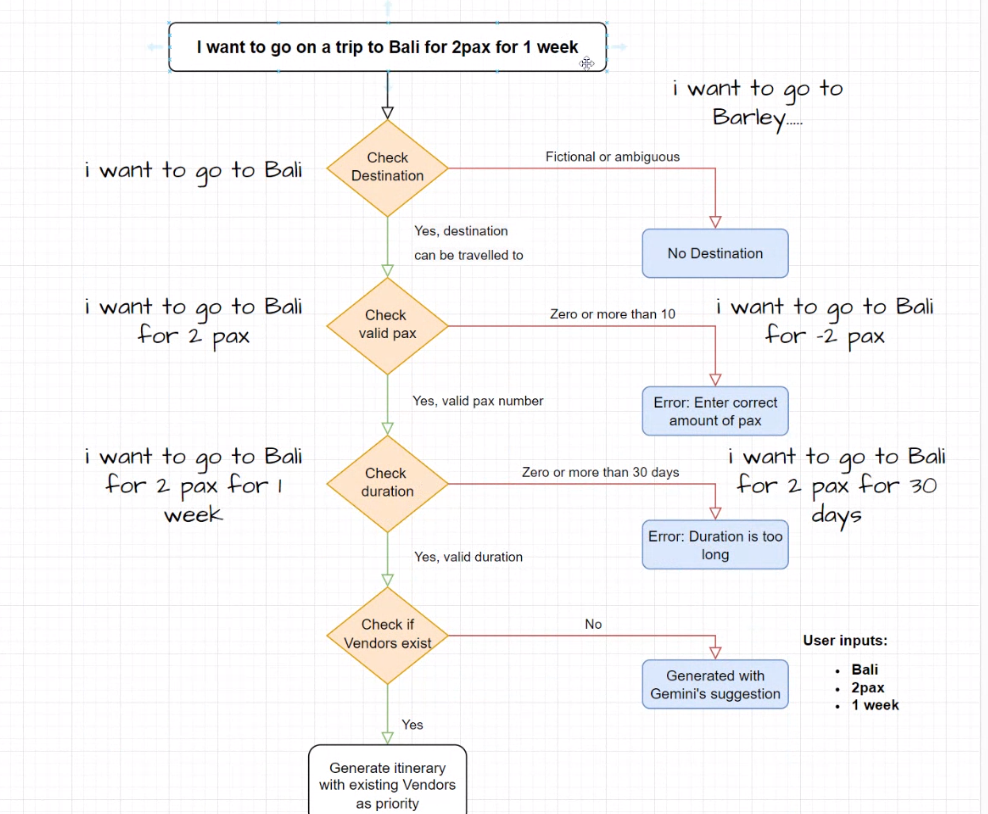
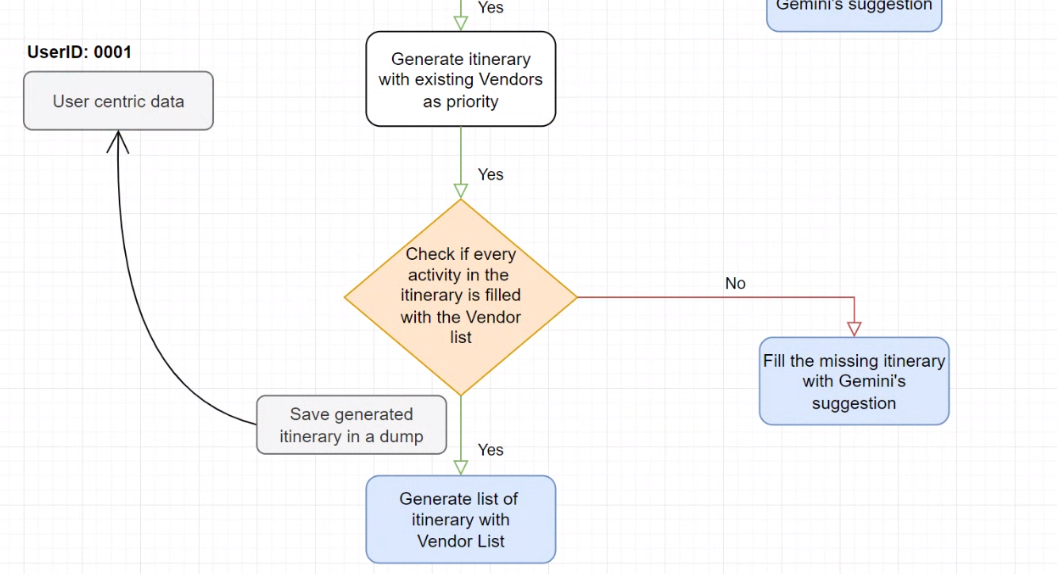
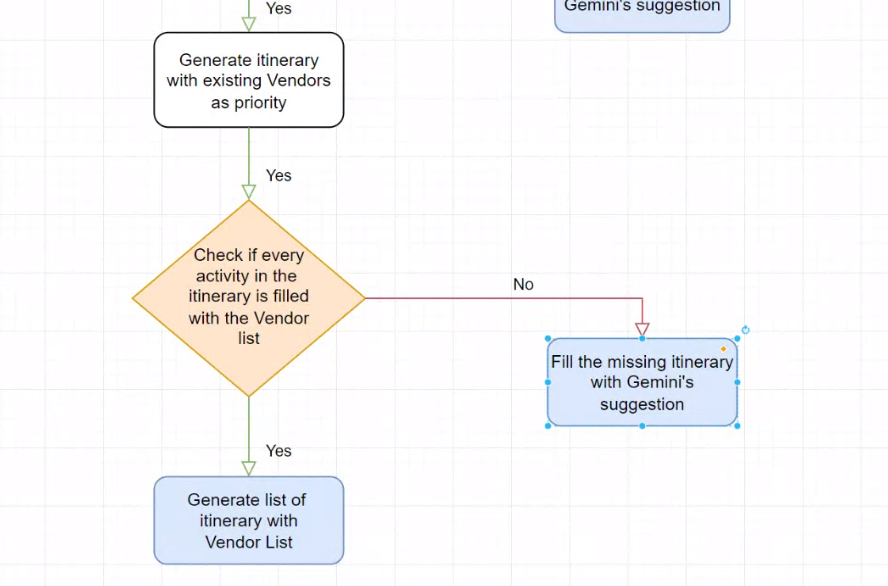
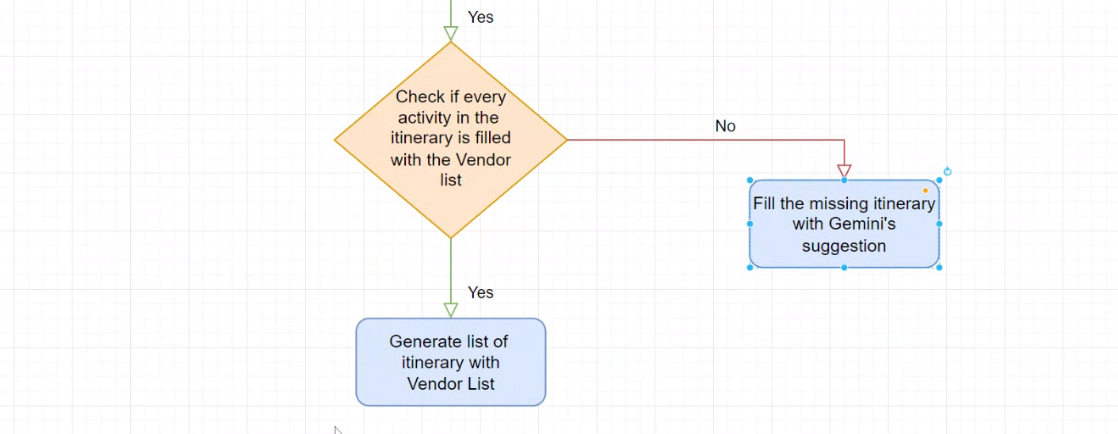
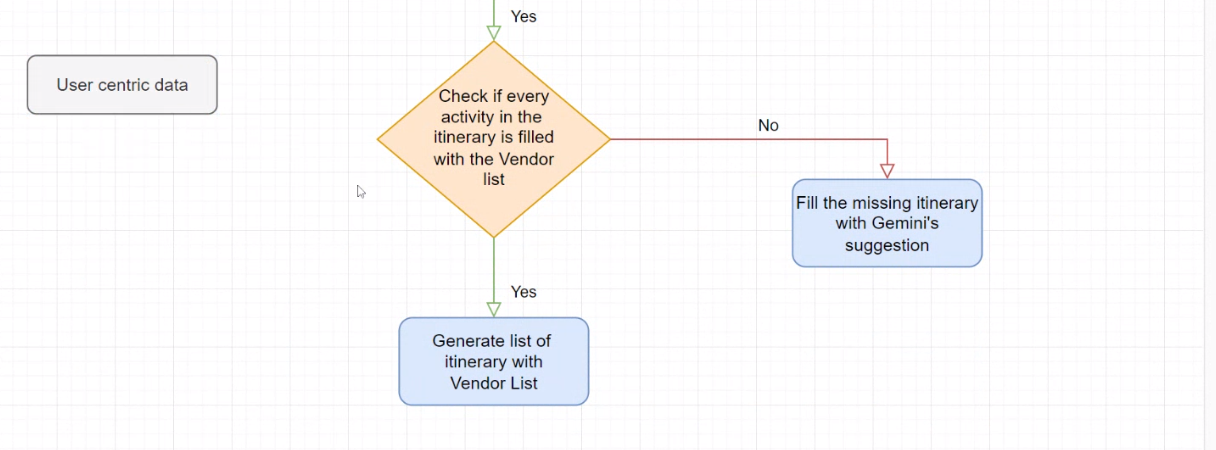
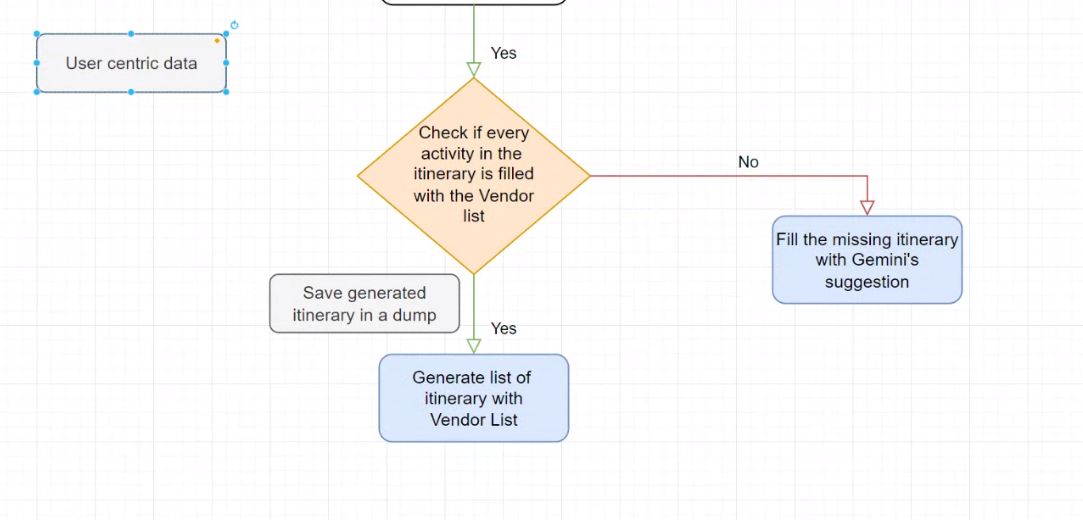

In [4]:
pip install whisper

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.8 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 693.5 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41393 sha256=8e1af14979a07c60aef11a5664f59b7adc2ab3b194fae9d371ec5fbe9f88f732
  Stored in directory: c:\users\shaik\appdata\local\pip\cache\wheels\34\b8\4e\9c4c3351d670e06746a340fb4b7d854c76517eec225e5b32b1
Successfully built whisper
Note: you may need to r

In [1]:
# transcribe a video to text using whispr
import whisper

model = whisper.load_model("base")
result = model.transcribe("audio.mp3")
print(result["text"])

TypeError: argument of type 'NoneType' is not iterable